In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import stats
from scipy.stats import norm, skew

from sklearn.preprocessing import LabelEncoder; encoder = LabelEncoder()
from sklearn.preprocessing import StandardScaler; sc = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
# from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import roc_auc_score, accuracy_score

from sklearn.linear_model import LinearRegression as lr
from sklearn.tree import DecisionTreeRegressor as dt
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.svm import SVR as svr
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.ensemble import AdaBoostRegressor as ab
from sklearn.ensemble import GradientBoostingRegressor as gb
import lightgbm as lgb
from lightgbm import plot_importance

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import joblib

In [3]:
data = pd.read_csv("data/amadeus/amadeus_data_전처리_0601.csv", index_col = 0)

In [4]:
data

,여행지,수집 요일,비행 요일,비행_월,비행 dday,마지막 티켓팅 dday,남은 좌석 수,비행 시간,출발 시간,도착 시간,경유 횟수,항공기 코드 번호,가격
0,ACC,3,0,6,11,11,4,29.2,23.9,20.2,2,77W,875.81
1,ACC,3,0,6,11,4,4,27.4,1.8,20.2,2,77W,889.37
2,ACC,3,0,6,11,11,7,19.5,0.8,11.3,1,788,917.15
3,ACC,3,0,6,11,11,9,20.7,23.9,11.6,1,77W,1008.81
4,ACC,3,0,6,11,4,4,43.8,20.2,7.0,2,333,1047.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020090,MES,2,6,5,340,340,9,23.8,15.3,13.1,1,333,984.95
4020091,MES,2,6,5,340,340,9,25.8,15.3,15.1,1,333,984.95
4020092,MES,2,6,5,340,340,9,17.2,16.8,8.0,1,359,1350.84
4020093,MES,2,6,5,340,340,9,25.0,9.0,8.0,1,359,1350.84


# Labeling

In [5]:
data['여행지'] = encoder.fit_transform(data['여행지'])
print(encoder.classes_)
data['항공기 코드 번호'] = encoder.fit_transform(data['항공기 코드 번호'])
print(encoder.classes_)

['ACC' 'AKL' 'ALG' 'AMM' 'AMS' 'ATL' 'AUH' 'BAH' 'BCN' 'BDO' 'BGO' 'BKI'
 'BKK' 'BLR' 'BNE' 'BOG' 'BOM' 'BOS' 'BPN' 'BRU' 'BUD' 'CAI' 'CAN' 'CBR'
 'CCU' 'CDG' 'CEB' 'CGK' 'CHC' 'CKG' 'CMB' 'CMN' 'CNS' 'CNX' 'CPT' 'CRK'
 'CTS' 'CUN' 'CXR' 'DAD' 'DAR' 'DEL' 'DFW' 'DLC' 'DMM' 'DOH' 'DPS' 'DUB'
 'DUS' 'DXB' 'EZE' 'FCO' 'FRA' 'FUK' 'GIG' 'GRU' 'GUM' 'GVA' 'HAN' 'HEL'
 'HGH' 'HKG' 'HKT' 'HND' 'HNL' 'IAD' 'IGR' 'IKA' 'IST' 'JED' 'JFK' 'JNB'
 'KHH' 'KIX' 'KNO' 'KRS' 'KTM' 'KUL' 'KWI' 'LAS' 'LAX' 'LCY' 'LHR' 'LIM'
 'LIN' 'LIS' 'LOP' 'MAA' 'MAD' 'MCO' 'MEL' 'MES' 'MEX' 'MFM' 'MIA' 'MLE'
 'MNL' 'MUC' 'MXP' 'NAN' 'NBO' 'NGO' 'NKG' 'NRT' 'OKA' 'ORD' 'ORY' 'OSL'
 'PDX' 'PEK' 'PER' 'PRG' 'RMQ' 'ROR' 'RUH' 'SCL' 'SEA' 'SGN' 'SHA' 'SHE'
 'SIN' 'SPN' 'SRG' 'SUB' 'SVG' 'SYD' 'SZX' 'TAO' 'TAS' 'TLV' 'TPE' 'TRD'
 'TSN' 'UIO' 'ULN' 'VCE' 'VVO' 'WAW' 'YIA' 'YNJ' 'YUL' 'YYZ' 'ZAG' 'ZQN'
 'ZRH']
['319' '320' '321' '32N' '32Q' '330' '332' '333' '339' '343' '359' '388'
 '738' '739' '73H' '73J' '744' '74H' '763' 

# normalization

/Users/zudy-b/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 1170.29 and sigma = 981.03



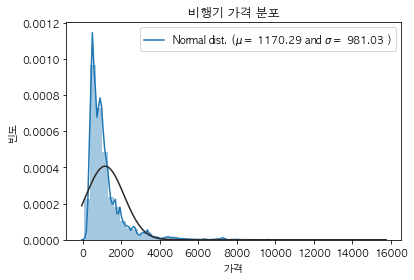

/Users/zudy-b/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zudy-b/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


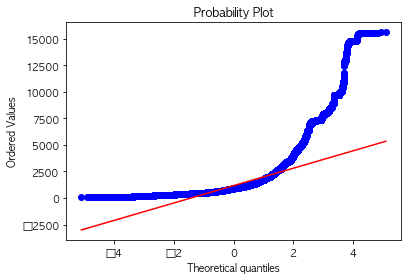

In [6]:
plt.rcParams['font.family'] = 'AppleGothic'
sns.distplot(data['가격'] , fit = norm);
(mu, sigma) = norm.fit(data['가격'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
loc='best')
plt.ylabel('빈도')
plt.title('비행기 가격 분포')

fig = plt.figure()
res = stats.probplot(data['가격'], plot=plt)
plt.show()

/Users/zudy-b/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 6.84 and sigma = 0.63



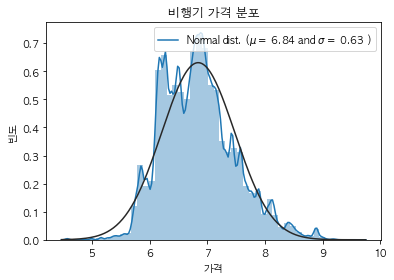

/Users/zudy-b/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zudy-b/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


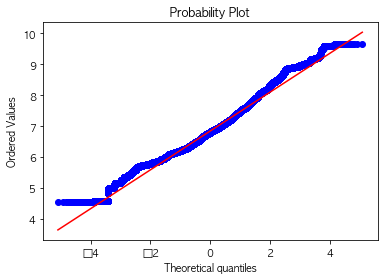

In [7]:
plt.rcParams['font.family'] = 'AppleGothic'
y = np.log1p(data['가격'])
x = data.drop("가격", axis = 1)

sns.distplot(y , fit = norm)
(mu, sigma) = norm.fit(y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
loc='best')
plt.ylabel('빈도')
plt.title('비행기 가격 분포')

fig = plt.figure()
res = stats.probplot(y, plot=plt)
plt.show()

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 333)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# GridSearch CV

In [54]:
xx, xx2, yy, yy2 = train_test_split(X_train, Y_train, test_size = 0.9, random_state = 333)

lgbr = lgb.LGBMRegressor()
param_grid = {'n_estimators': [1200, 1500, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200],
               'max_depth': [5, 15, 20, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35],
               'num_leaves': [50, 75, 100, 125, 150, 175, 200]
              }


gcv_gb = GridSearchCV(lgbr, param_grid, cv = 3)
res = gcv_gb.fit(xx, yy)

print(res.best_score_)
print(res.best_params_)

0.9497356935016138
{'max_depth': 33, 'n_estimators': 3200, 'num_leaves': 175}


# Feature Selection

In [43]:
data.corr()

,여행지,수집 요일,비행 요일,비행_월,비행 dday,마지막 티켓팅 dday,남은 좌석 수,비행 시간,출발 시간,도착 시간,경유 횟수,항공기 코드 번호,가격
여행지,1.000000,0.000916,-0.000580,-0.003053,-0.007352,-0.058806,-0.009916,-0.008038,0.011938,0.030717,0.002440,-0.013031,-0.011355
수집 요일,0.000916,1.000000,-0.000297,-0.002812,0.005902,0.002118,0.002699,0.000700,-0.000920,0.000887,-0.000226,0.001127,-0.001663
비행 요일,-0.000580,-0.000297,1.000000,-0.004076,0.062079,0.028483,0.001900,-0.008906,0.002229,0.001877,-0.010232,-0.011872,0.006224
비행_월,-0.003053,-0.002812,-0.004076,1.000000,-0.408844,-0.209348,-0.042604,0.034292,-0.049636,0.010119,-0.002167,0.059304,-0.024327
비행 dday,-0.007352,0.005902,0.062079,-0.408844,1.000000,0.591087,0.084417,-0.041576,0.095476,-0.019310,0.004717,-0.067686,0.020237
마지막 티켓팅 dday,-0.058806,0.002118,0.028483,-0.209348,0.591087,1.000000,0.089588,-0.184182,-0.080434,-0.004850,-0.021314,-0.231855,0.056412
남은 좌석 수,-0.009916,0.002699,0.001900,-0.042604,0.084417,0.089588,1.000000,-0.072280,-0.043625,0.003072,-0.128530,-0.030726,-0.109926
비행 시간,-0.008038,0.000700,-0.008906,0.034292,-0.041576,-0.184182,-0.072280,1.000000,-0.056513,-0.200695,0.498252,0.206251,0.169751
출발 시간,0.011938,-0.000920,0.002229,-0.049636,0.095476,-0.080434,-0.043625,-0.056513,1.000000,-0.056271,-0.080896,-0.102369,0.085076
도착 시간,0.030717,0.000887,0.001877,0.010119,-0.019310,-0.004850,0.003072,-0.200695,-0.056271,1.000000,-0.070339,-0.023952,-0.108085


/Users/zudy-b/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zudy-b/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

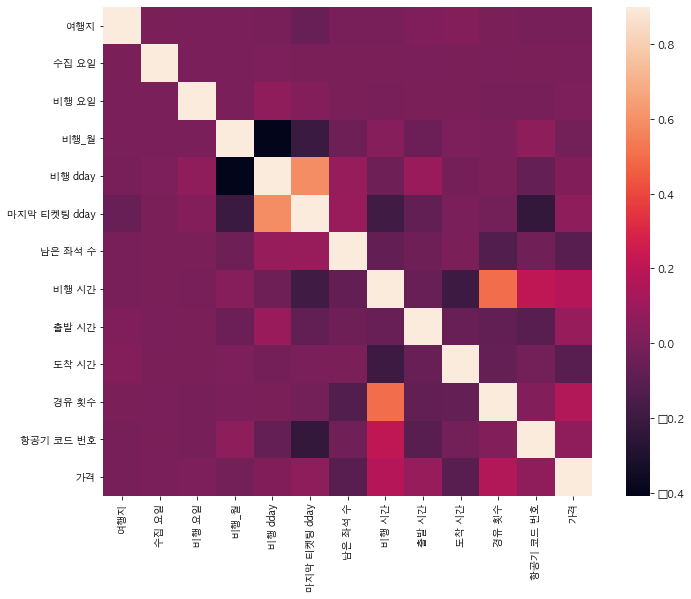

In [44]:
corrmat = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [48]:
# lgbr = lgb.LGBMRegressor(n_estimators = 2300, num_leaves = 125, max_depth = 32)

# model = SelectFromModel(lgbr)
# model.fit(X_train, Y_train)

selected_features = x.columns[(model.get_support())]
selected_features

Index(['여행지', '마지막 티켓팅 dday', '비행 시간', '출발 시간', '도착 시간'], dtype='object')

# 하이퍼 파라미터 LGBM

In [9]:
lgbr = lgb.LGBMRegressor(n_estimators = 2300, num_leaves = 125, max_depth = 32)
lgbr.fit(X_train, Y_train)
pred = lgbr.predict(X_test)
test_score = r2_score(Y_test, pred)
train_score = r2_score(Y_train, lgbr.predict(X_train))

print('R2 score is', test_score)
print('R2 for train data', train_score)
print('Mean absolute error is', mean_absolute_error(Y_test, pred))
print('Mean squared error is', mean_squared_error(Y_test, pred))
print('Root mean squared error is', (mean_squared_error(Y_test, pred, squared = False)))

R2 score is 0.9742848127907644
R2 for train data 0.9772858146777308
Mean absolute error is 0.05964436858782432
Mean squared error is 0.010274256590294096
Root mean squared error is 0.10136200762758252


In [10]:
joblib.dump(lgbr, 'flight_price.obj')

['flight_price.obj']

In [11]:
pd.options.display.float_format = '{:.5f}'.format
predicted_values = pd.DataFrame({'Actual':Y_test, 'Predicted':pred})

print(predicted_values)

         Actual  Predicted
2834089 6.21036    6.27947
1876331 6.77858    6.84709
3020006 6.93933    6.92728
1333883 7.02226    7.03826
2648476 7.92594    7.95912
...         ...        ...
2392459 6.74210    6.75608
3029373 8.29470    8.27466
351558  7.35884    7.27490
2648771 6.64875    6.71378
3220840 6.46641    6.47511

[1206029 rows x 2 columns]


/Users/zudy-b/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='가격', ylabel='Density'>

/Users/zudy-b/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zudy-b/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


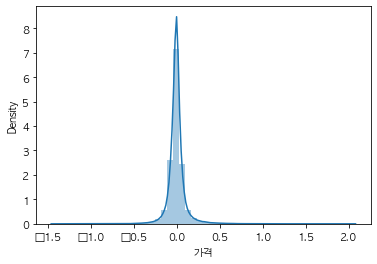

In [12]:
sns.distplot(Y_test-pred)

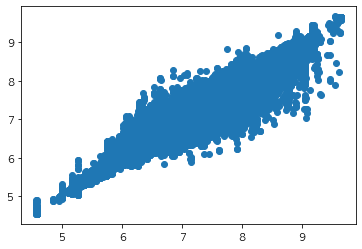

In [13]:
plt.scatter(Y_test, pred)

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_reg, ax=ax)

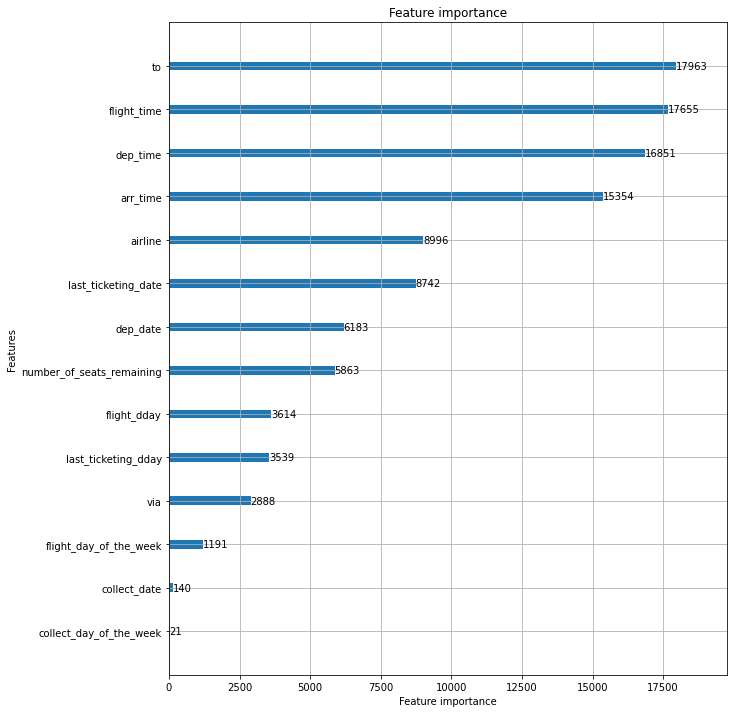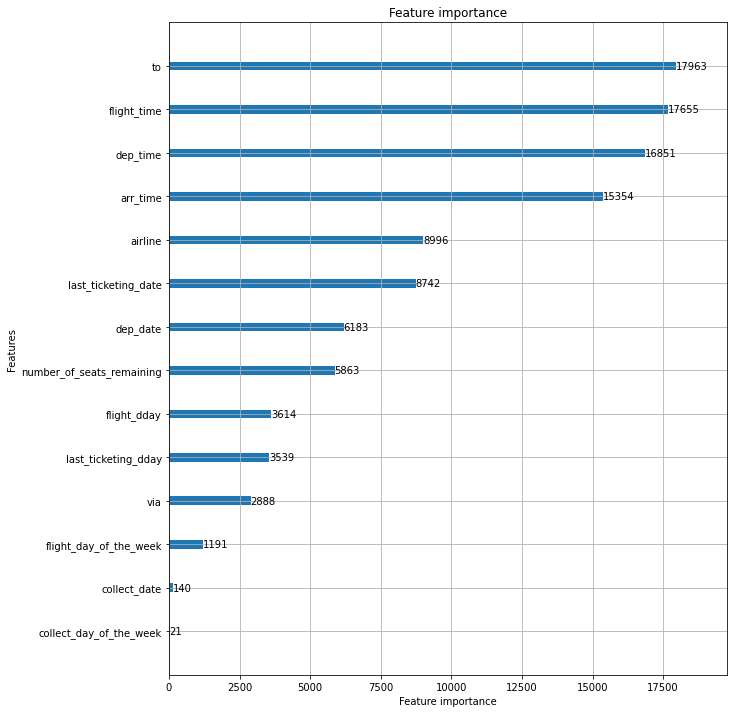

In [ ]:
result = pd.DataFrame({'actual': y_test, 'prediction': lgbm_reg_predict})
result = result.sort_values(by='actual').reset_index(drop=True)

plt.figure(figsize=(20, 12))
plt.scatter(result.index, result['prediction'], marker='x', color='green')
plt.scatter(result.index, result['actual'], alpha=0.7, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()

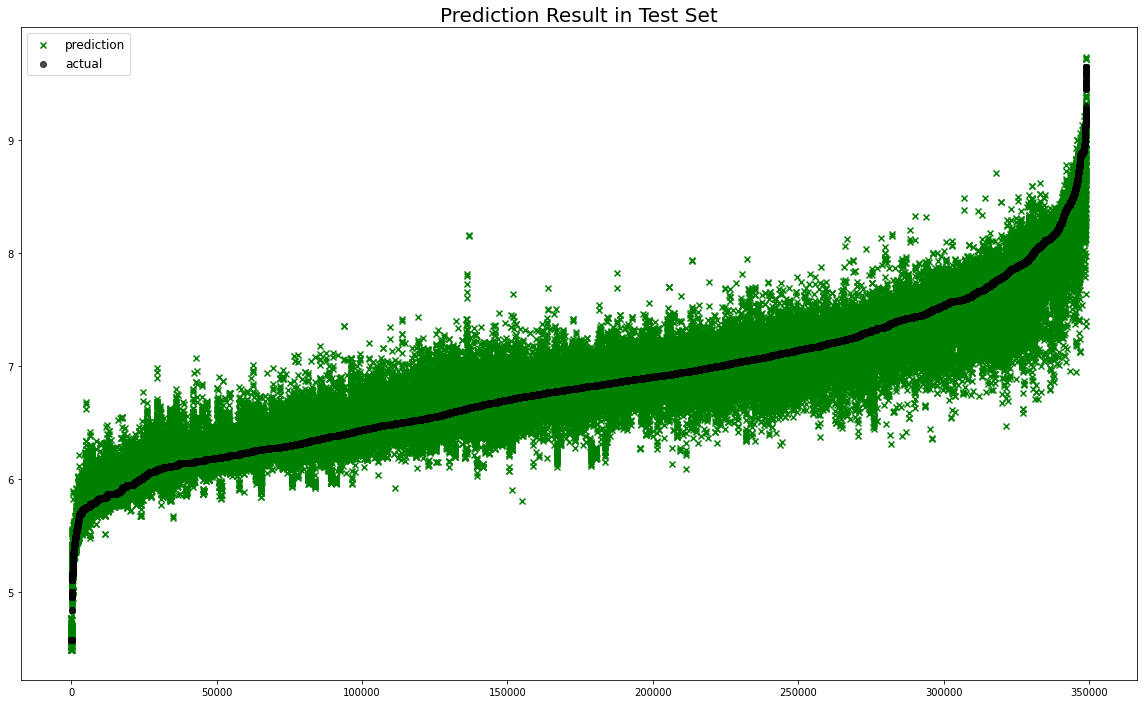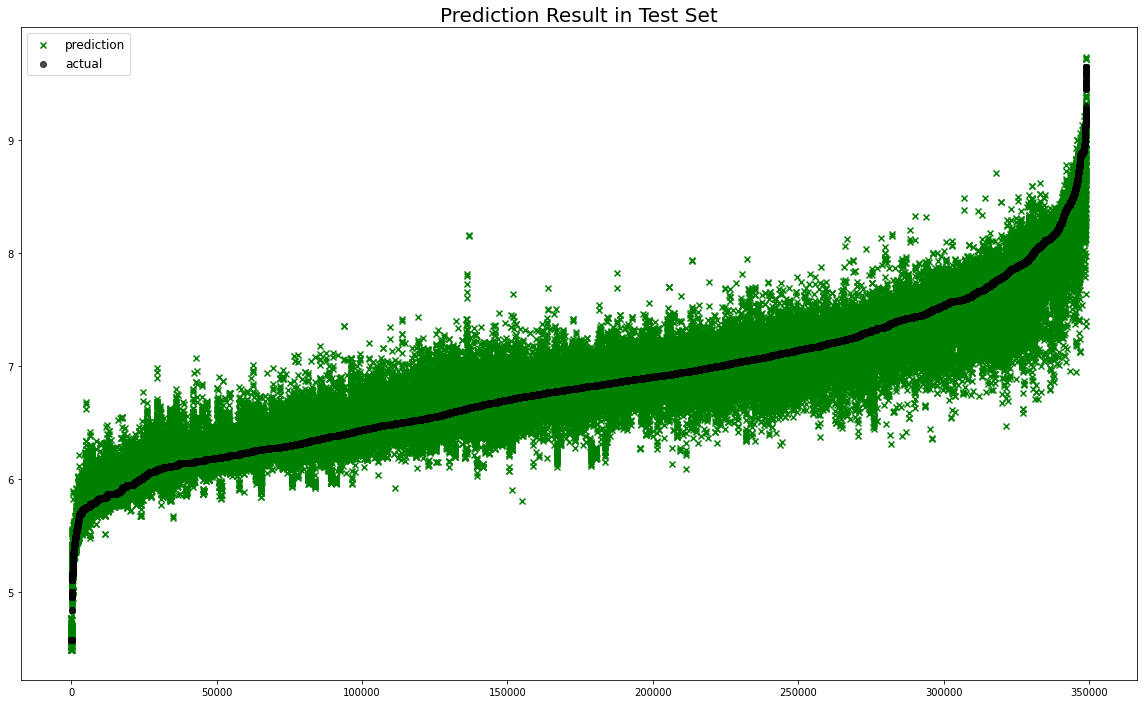

In [ ]:
import lightgbm
lightgbm.plot_metric(lgbm_reg, figsize=(8,6)) # 훈련에 대한 메트릭's 기록

위의 코드 실행하면 아래 사진처럼 나와요!!

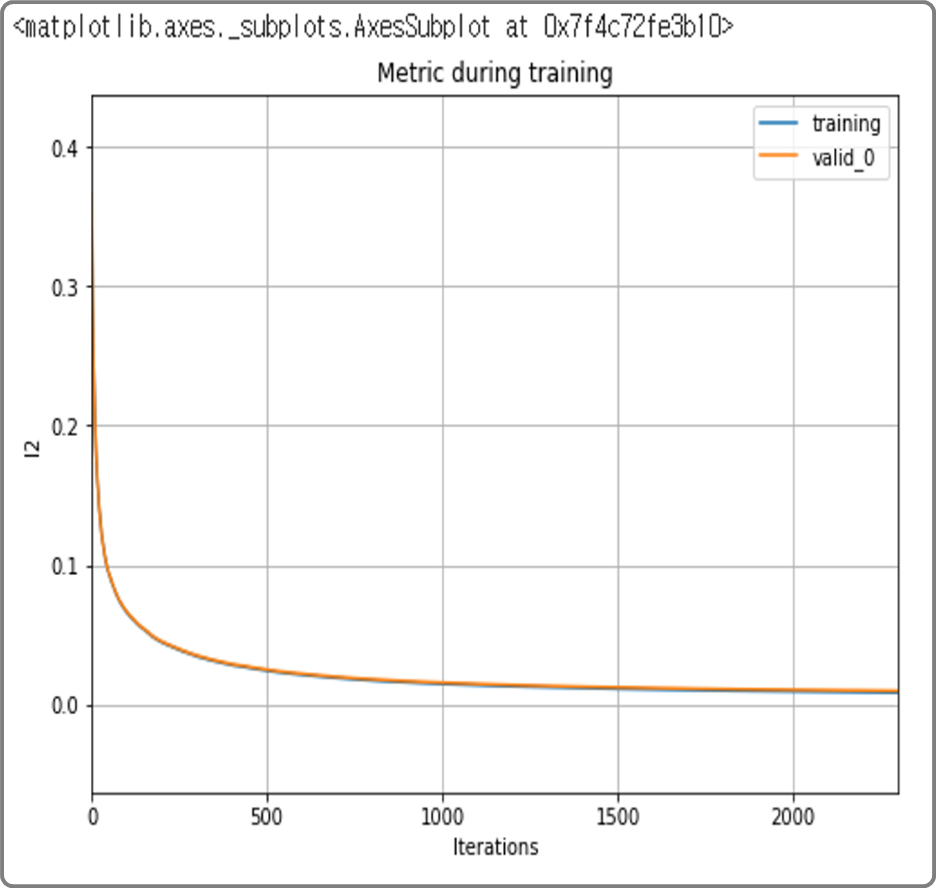